# THE SPARK FOUNDATION

DATA SCIENCE AND BUSINESS ANALYTICS INTERN

NAME : ANIKET KANDARA

TASK 3 : PREDICTION USING DECISION TREE ALGORITHM

Problem Statement : Create a Decision Tree classifier and visualize it graphically so that is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
# Importing the required liraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the data in notebook

data = pd.read_csv("G:\iris.csv")

In [3]:
# Showing the first 5 rows of data

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Checking the dimensions of dataset

data.shape

(150, 6)

In [5]:
# Checking whether there is any empty block or not in data

data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Separating into dependent and independent variables

Dependent variable is our target variable i.e Species 

And Remaining are the independent variable

In [6]:
y=data['Species']        # Dependent Variable
X=data.drop(['Species','Id'], axis=1)        # Independent variable

In [7]:
# Importing train_test_split so that we can train the model and test the model for checking the accuracy of model

from sklearn.model_selection import train_test_split

In [8]:
# Dividing the data into train and test dataset

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.60)

In [9]:
# Checking that how many different quantity are there in our target variable

y_train.value_counts(normalize=True)

Iris-versicolor    0.400000
Iris-virginica     0.333333
Iris-setosa        0.266667
Name: Species, dtype: float64

There are 3 different quantites

In [10]:
# Checking the dimensions of train data set

X_train.shape, y_train.shape

((60, 4), (60,))

In [11]:
# Importing Decision Tree Classifier and Regressor to deploy on our dataset

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [12]:
# Creating an instance of Decision Tree Classifier

dt_model = DecisionTreeClassifier()

In [13]:
# Fitting the data in Algorithm

dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
# Checking the accuracy score of this model on train dataset

dt_model.score(X_train, y_train)

1.0

In [15]:
# Checking the accuracy score on test data set

dt_model.score(X_valid, y_valid)

0.9555555555555556

In [16]:
# Making predictions from the model on the test dataset

dt_model.predict(X_valid)

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'I

In [17]:
# Probability of predictions we have calculated from the model

dt_model.predict_proba(X_valid)

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1

# We can have any number of depths in decision tree so we have to calculate accuracy for a range of depths so that we can find optimal value of depth.

In [18]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [19]:
# Making a dataframe of train accuracy and test accuracy

frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.716667,0.566667
1,2,0.983333,0.944444
2,3,0.983333,0.944444
3,4,1.000000,0.955556
4,5,1.000000,0.955556


# With dataframe we can't check the optimum level of depth so we make a graph with both the accuracies.

No handles with labels found to put in legend.


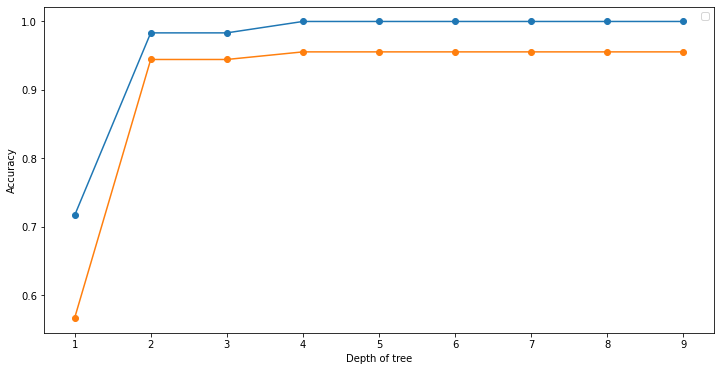

In [20]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.legend()

From that graph we can see that maximum accuracy is at depth = 4

In [21]:
# Implementing decision tree algorithm with depth = 4

dt_model = DecisionTreeClassifier(max_depth=4)

In [22]:
# Fitting the train dataset in the model

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [23]:
# Checking the accuracy score of model on train dataset

dt_model.score(X_train, y_train)

1.0

In [24]:
# Checking the accuracy score of model on test dataset

dt_model.score(X_valid, y_valid)

0.9555555555555556

# For displaying the graph we have to install some packages

In [25]:
!pip install pydotplus
!pip install graphviz

In [26]:
# importing tree module so that we can make a decision tree

from sklearn import tree

In [27]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dt_model, 'tree.dot', feature_names=X_train.columns, max_depth = 4,
                filled=True, rounded=True,
                special_characters=True)
! dot -Tpng tree.dot -o tree.png    



# This is the command which convert dot file into a png file

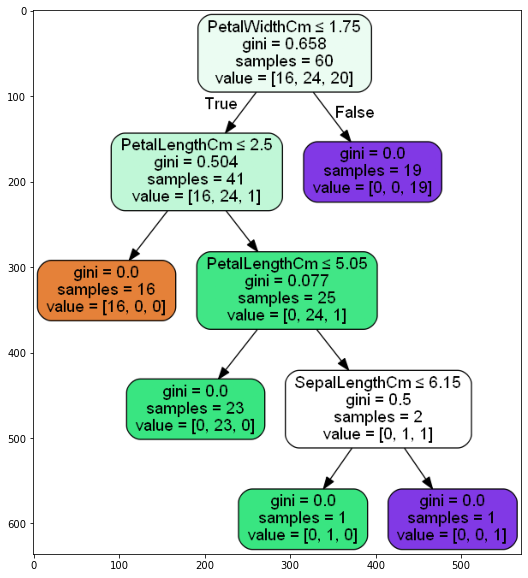

In [28]:
image = plt.imread('tree.png')
plt.figure(figsize=(10,10))
plt.imshow(image)

# Thank You